In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("joined_cyberbullying_tweet.csv")

Before Hyperparamater Tuning: 
Training Accuracy:  0.8089226550896835
Testing Accuracy:  0.7399748657603108

Classification Report: 
                      precision    recall  f1-score   support

                age       0.70      0.96      0.81      1532
          ethnicity       0.82      0.91      0.86      1509
             gender       0.79      0.76      0.78      1479
  not_cyberbullying       0.67      0.30      0.41      1240
other_cyberbullying       0.63      0.49      0.55      1382
           religion       0.76      0.90      0.82      1611

           accuracy                           0.74      8753
          macro avg       0.73      0.72      0.71      8753
       weighted avg       0.73      0.74      0.72      8753



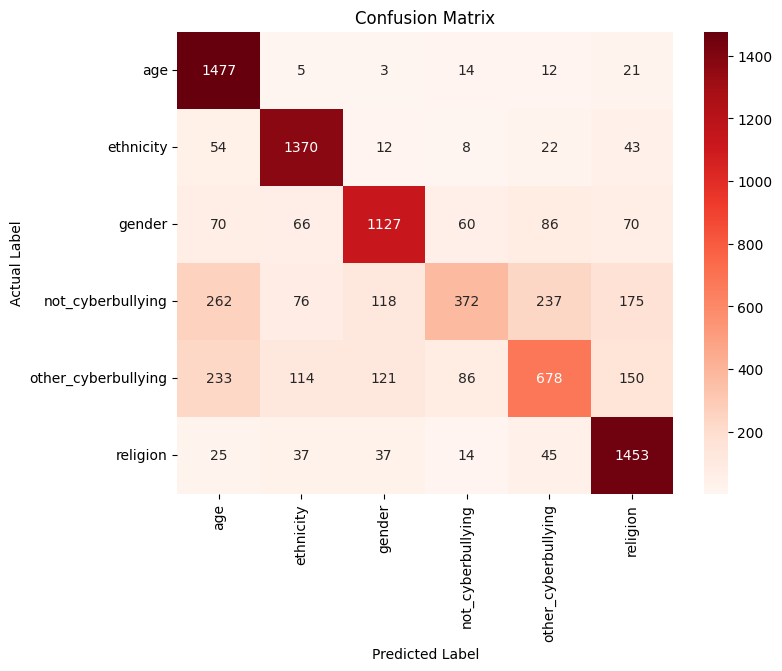

In [14]:
x = df["tweet_text"]
y = df["cyberbullying_type"]

# Label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into 80% training and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('mnb', MultinomialNB())
])

pipeline.fit(x_train, y_train)

mnb__train_y_pred = pipeline.predict(x_train)
mnb_test_y_pred = pipeline.predict(x_test)

train_accuracy = accuracy_score(y_train, mnb__train_y_pred)
test_accuracy = accuracy_score(y_test, mnb_test_y_pred)
test_conf_matrix = confusion_matrix(y_test, mnb_test_y_pred)
test_class_report = classification_report(y_test, mnb_test_y_pred, target_names=label_encoder.classes_)

print("Before Hyperparamater Tuning: ")
print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)
print("\nClassification Report: \n", test_class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, cmap='Reds', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

Hyperparameter Tuning

In [72]:
param_grid = {
    'vectorizer__max_features': [1000, 5000, 10000],  
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'mnb__alpha': [0.1, 0.5, 1.0], 
    'mnb__fit_prior': [True, False],
    'mnb__force_alpha': [True, False],
    'mnb__class_prior': [[0.2, 0.3, 0.4, 0.3, 0.5, 0.2], [0.3, 0.3, 0.3, 0.3, 0.3, 0.3], None]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean Cross-validated Score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'mnb__alpha': 0.5, 'mnb__class_prior': [0.3, 0.3, 0.3, 0.3, 0.3, 0.3], 'mnb__fit_prior': True, 'mnb__force_alpha': True, 'vectorizer__max_features': 10000, 'vectorizer__ngram_range': (1, 2)}
Best Mean Cross-validated Score: 0.7700503717690991


In [13]:
# Tuned Logistic Regression
best_param = {'alpha': 0.5, 
              'class_prior': [0.3, 0.3, 0.3, 0.3, 0.3, 0.3], 
              'force_alpha': True, 
              'fit_prior': True}
 
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=10000, ngram_range=(1,2))),
    ('mnb', MultinomialNB(**best_param))
])

pipeline.fit(x_train,y_train)
mnb_train_y_pred = pipeline.predict(x_train)
mnb_test_y_pred = pipeline.predict(x_test)

tuned_train_accuracy = accuracy_score(y_train, mnb__train_y_pred)
test_accuracy = accuracy_score(y_test, mnb_test_y_pred)
test_class_report = classification_report(y_test, mnb_test_y_pred, target_names=label_encoder.classes_)

print("After Hyperparamater Tuning: ")
print("Train Accuracy: ", tuned_train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("\nClassification Report: \n", test_class_report)

After Hyperparamater Tuning: 
Train Accuracy:  0.8089226550896835
Test Accuracy:  0.7664800639780647

Classification Report: 
                      precision    recall  f1-score   support

                age       0.81      0.96      0.88      1532
          ethnicity       0.88      0.92      0.90      1509
             gender       0.86      0.72      0.78      1479
  not_cyberbullying       0.57      0.47      0.51      1240
other_cyberbullying       0.60      0.57      0.59      1382
           religion       0.79      0.89      0.84      1611

           accuracy                           0.77      8753
          macro avg       0.75      0.75      0.75      8753
       weighted avg       0.76      0.77      0.76      8753

